In [441]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_csv = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')
data_csv.sample(5)

/tmp/ipykernel_11367/748315365.py:6: DtypeWarning: Columns (0,3,5,24,25,26,27,28,35,36,37,38,39,48,65,67,70,71,72,78,79,80,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
263230,8022780300080,http://world-fr.openfoodfacts.org/produit/8022...,kiliweb,1492341843,2017-04-16T11:24:03Z,1492341847,2017-04-16T11:24:07Z,Pere allo sciroppo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149657,3045320104127,http://world-fr.openfoodfacts.org/produit/3045...,grdscarabe,1340561706,2012-06-24T18:15:06Z,1490615233,2017-03-27T11:47:13Z,Oranges pressées,Jus d'orange,1 l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163402,3248830692249,http://world-fr.openfoodfacts.org/produit/3248...,tacite,1432245738,2015-05-21T22:02:18Z,1436990000,2015-07-15T19:53:20Z,Merguez Grillées Semoule aux Courgettes,"Merguez grillées, semoule aux courgettes & com...",280 g (1 pers.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273232,8712566172948,http://world-fr.openfoodfacts.org/produit/8712...,reine-des-fleurs,1372072385,2013-06-24T11:13:05Z,1443001618,2015-09-23T09:46:58Z,Becel pro-activ,Margarine,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51919,72036708090,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489060523,2017-03-09T11:55:23Z,1489060523,2017-03-09T11:55:23Z,Creamy Hazelnut Cocoa Spread Made With Over 50...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
data_before_action = data_csv.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

# Liste des colonnes à conserver
variables_pertinentes = [
    'created_datetime','code', 'product_name', 'brands', 'categories', 'ingredients_text', 'additives_tags', 'nutrition_grade_fr',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g','fiber_100g','fat_100g', 'saturated-fat_100g',
    'alcohol_100g', 'countries_fr','potassium_100g','calcium_100g','vitamin-a_100g','vitamin-c_100g','vitamin-d_100g','cholesterol_100g','image_url'
]

start = time.time()
data = data_csv.drop([col for col in data_csv.columns if col not in variables_pertinentes], axis=1)
end = time.time()
print(f"Temps d'exécution de la méthode drop() : {end - start:.4f} secondes")

Le nombre de lignes data avant action est 279417
Temps d'exécution de la méthode drop() : 0.0505 secondes


In [443]:
#doublons
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

duplicates = data[data.duplicated(subset=['code'], keep=False)]
print(f'Le nombre de doublons est {duplicates.shape[0]}')

most_recent_duplicates = duplicates.sort_values(by='created_datetime',ascending=False).drop_duplicates(subset=['code'])
data = data.drop(most_recent_duplicates.index, errors='ignore')

print(f'Le nombre de lignes data après suppression des doublons est {data.shape[0]}, {data_before_action - data.shape[0]} ont été supprimés')

Le nombre de lignes data avant action est 279417
Le nombre de doublons est 199
Le nombre de lignes data après suppression des doublons est 279328, 89 ont été supprimés


Le nombre de lignes data avant action est 279328


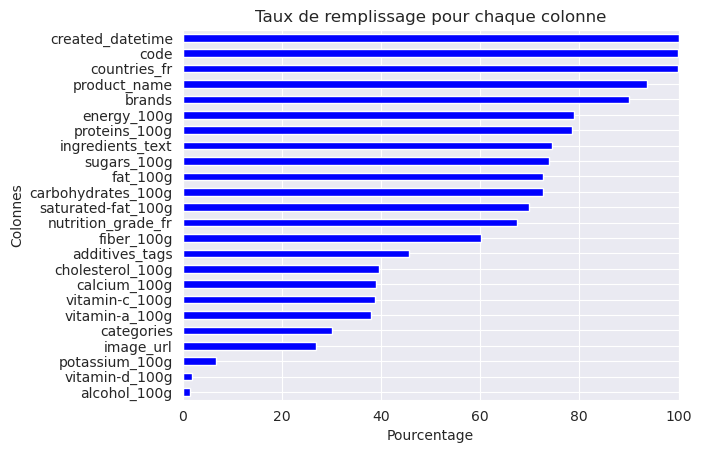

In [444]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')
#taux de remplissage des variables

missing_values = 100*(data[variables_pertinentes].notnull().mean())
missing_values = missing_values.sort_values(ascending=True)
missing_values.plot(kind='barh',title='Taux de remplissage pour chaque colonne', color='blue', xlim=[0,100])
plt.xlabel('Pourcentage')
plt.ylabel('Colonnes')
plt.show()

In [445]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#La variables  code et product_name sont obligatoires
empty_mandatory_variables = data[
    (data['product_name'].isna()) | ((data['code'].isna()))
]
print(f'Les individus avec un nom de produit ou code vides sont aux nombre de {len(empty_mandatory_variables)}')
data.drop(empty_mandatory_variables.index, inplace=True)

#imputation par 0 pour les variables quantitatives
cols = ['potassium_100g','calcium_100g','vitamin-a_100g','vitamin-c_100g','vitamin-d_100g','cholesterol_100g','energy_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g','fiber_100g','fat_100g', 'saturated-fat_100g', 'alcohol_100g']
data[cols] = data[cols].fillna(0)


Le nombre de lignes data avant action est 279328
Les individus avec un nom de produit ou code vides sont aux nombre de 17613


Le nombre de lignes data avant action est 261715
<function show at 0x7fad5d44e830>


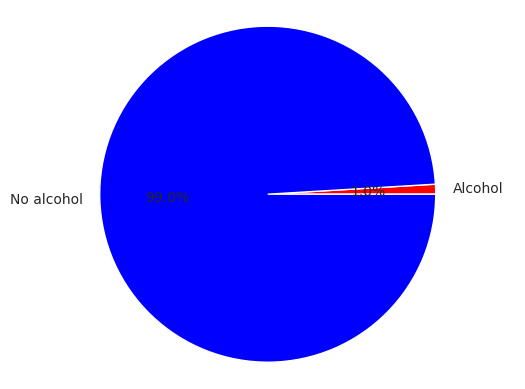

In [446]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#Les produits contenant de l'alcool sont à bannir
data_alcohol = data[data['alcohol_100g'] > 0]
data_no_alcohol = data[data['alcohol_100g'] == 0]
percent_alcohol = len(data_alcohol) / len(data)
percent_no_alcohol = len(data_no_alcohol) / len(data)
labels = ['Alcohol', 'No alcohol']
sizes = [percent_alcohol, percent_no_alcohol]
colors = ['red', 'blue']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax.axis('equal')
print(plt.show)
indices_to_drop = data[data['alcohol_100g'] > 0].index
data = data.drop(indices_to_drop)

Le nombre de lignes data avant action est 259225
31371 produits ont été retirés


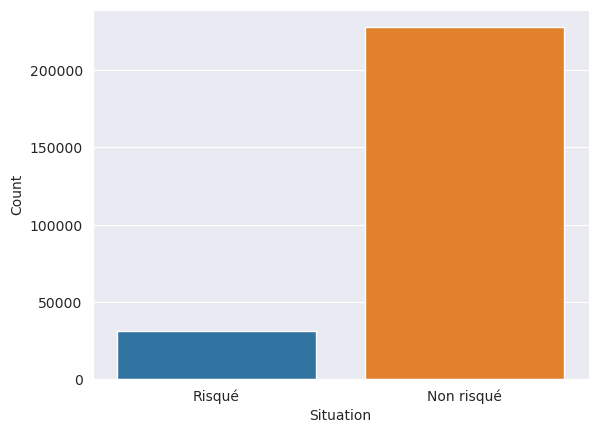

In [447]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#les additifs
data.loc[data['additives_tags'].isnull(), 'additives_tags'] = ''
risky_additives = ['E250', 'E450', 'E202', 'E407', 'E252', 'E621', 'E224', 'E211', 'E482', 'E249', 'E212', 'E343',
                   'E1102', 'E511', 'E155']
risky_additives_regex = '|'.join(risky_additives)  # join the elements of the list with `|`
data['additives_tags_clean'] = data['additives_tags'].str.replace('en:', '')

# print(data.loc[40:55, 'additives_tags_clean'])
data['risky'] = 'non'
risky = data[data['additives_tags_clean'].str.contains(risky_additives_regex, case=False)]
data.loc[risky.index, 'risky'] = 'oui'

risky_count = len(data[data['risky'] == 'oui'])
non_risky_count = len(data[data['risky'] == 'non'])
# Créer un dataframe avec les données à afficher dans le graphique
risky_frame = pd.DataFrame({'Situation': ['Risqué', 'Non risqué'], 'Count': [risky_count, non_risky_count]})
sns.barplot(x='Situation', y='Count', data=risky_frame)

#retirer les aliments risqué
print(f'{risky_count} produits ont été retirés')
data.drop(data[data['risky'] == 'oui'].index, inplace=True)


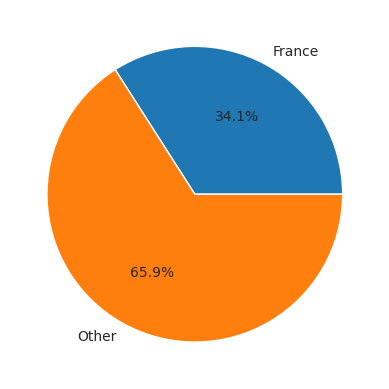

In [448]:
#répartition produits français
france_data = data[data['countries_fr'].str.contains('France', na=False)]
other_data = data[~data['countries_fr'].str.contains('France', na=False)]
france_percentage = len(france_data) / len(data) * 100
other_percentage = len(other_data) / len(data) * 100
plt.pie([france_percentage, other_percentage], labels=['France', 'Other'], autopct='%1.1f%%')
plt.show()


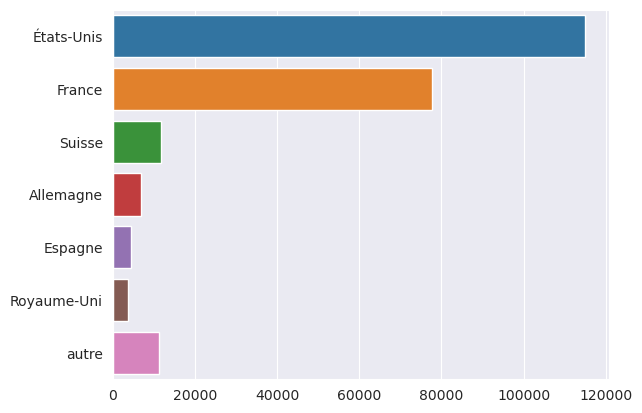

In [449]:
#répartition des produits par pays
pays = [
    "Afrique du Sud","Albanie","Algérie","Allemagne","Andorre","Angola","Arabie saoudite","Argentine","Arménie","Australie","Autriche","Azerbaïdjan",
    "Bahreïn","Bangladesh","Belgique","Belize","Bénin","Bhoutan","Biélorussie","Bolivie","Bosnie-Herzégovine","Botswana","Brésil","Brunei","Bulgarie","Burkina Faso","Burundi",
    "Cambodge","Cameroun","Canada","Cap-Vert","Chili","Chine","Chypre","Colombie","Comores","Congo","Corée du Nord","Corée du Sud","Costa Rica","Côte d'Ivoire","Croatie","Cuba",
    "Danemark","Djibouti","Dominique",
    "Égypte","Émirats arabes unis","Équateur","Érythrée","Espagne","Estonie","États-Unis","Éthiopie",
    "Fidji","Finlande","France",
    "Gabon","Gambie","Géorgie","Ghana","Grèce","Grenade","Guatemala","Guinée","Guinée-Bissau","Guinée équatoriale","Guyana",
    "Haïti","Honduras","Hong Kong","Hongrie",
    "Îles Marshall","Inde","Indonésie","Irak","Iran","Irlande","Islande","Israël","Italie",
    "Jamaïque","Japon","Jordanie",
    "Kazakhstan","Kenya","Kirghizistan","Kiribati","Koweït",
    "Laos","Lesotho","Lettonie","Liban","Liberia","Libye","Liechten","Liban","Lituanie","Luxembourg",
    "Malaisie","Malawi", "Mali", "Malte", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Monaco","Mongolie", "Monténégro",
    "Nigeria", "Norvège", "Nouvelle-Calédonie", "Nouvelle-Zélande",
    "Oman",
    "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal",
    "Qatar",
    "Roumanie", "Royaume-Uni", "République centrafricaine", "République dominicaine", "République tchèque",
    "Salvador", "Serbie", "Singapour", "Slovaquie", "Slovénie", "Suède",    "Suisse",
    "Taiwan", "Tanzanie", "Thaïlande", "Togo", "Tunisie", "Turquie",
    "Ukraine",
    "Venezuela", "Viêt Nam",
    "Yémen",
    "Zambie", "Zimbabwe"
]

data['countries_split'] = data['countries_fr'].str.split(',')
countries_series = data['countries_split'].explode().value_counts()
filtered_series = countries_series[countries_series.index.isin(pays)]

seuil = 3000
pays = filtered_series.loc[filtered_series >= seuil]
autre = pd.Series([filtered_series.loc[filtered_series < seuil].sum()], index=['autre'])
reordered_series =  pd.concat([pays, autre])

sns.barplot(x=reordered_series.values, y=reordered_series.index)
plt.show()

Le nombre de lignes data avant action est 227854


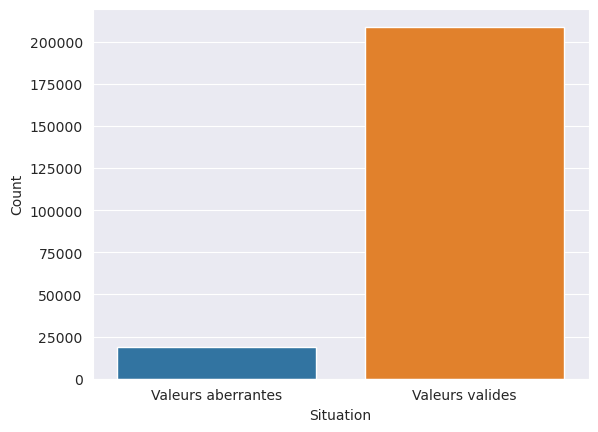

In [450]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#enlever les valeurs non numériques aberrantes
list = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g']
for v in list:
    data[v] = pd.to_numeric(data[v], errors='coerce')
    data.loc[data[v].isnull(), v] = 0
    data.loc[data[v] > 100, v] = 100

#les valeurs énergétiques sont aberrantes si les graisses saturées > aux graisses, si les sucres > carbohydrates et si la somme des carbohydrates, protéines et lipides dépassent 100g
aberrants = data[(data['saturated-fat_100g'] > data['fat_100g']) |
                 (data['sugars_100g'] > data['carbohydrates_100g']) |
                 (data['carbohydrates_100g'] + data['proteins_100g'] + data['fat_100g'] > 100)]

aberrants_count = len(aberrants)

aberrants_frame = pd.DataFrame(
    {'Situation': ['Valeurs aberrantes', 'Valeurs valides'], 'Count': [aberrants_count, len(data) - aberrants_count]})
sns.barplot(x='Situation', y='Count', data=aberrants_frame)
#suppression des valeurs aberrantes
data.drop(aberrants.index, inplace=True)

In [451]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#Valeur aberrantes énergétiques: création d'une colonne supplémentaire avec le bon calcul énergétique
kcal_prot = 4
kcal_glucide = 4
kcal_lipide = 9
data['kcal'] = (data['proteins_100g'] * kcal_prot + data['carbohydrates_100g'] * kcal_glucide + data['fat_100g'] * kcal_lipide)
# #Suppression des valeurs énergétiques <= 0 ou > 900
mask = ((data['kcal'] <= 0) | (data['kcal'] > 900 ))
print(f'Les lignes <= 0 sont au nombre de {(data["kcal"] <= 0).sum()}')
print(f'Les lignes > 900 sont au nombre de {(data["kcal"] > 900).sum()}')
data.drop(data[mask].index, inplace=True)


Le nombre de lignes data avant action est 208842
Les lignes <= 0 sont au nombre de 46055
Les lignes > 900 sont au nombre de 0


Le nombre de lignes data avant action est 162787
Le nombre de lignes < 100 calories 117501
Le nombre de lignes > 900 calories 0


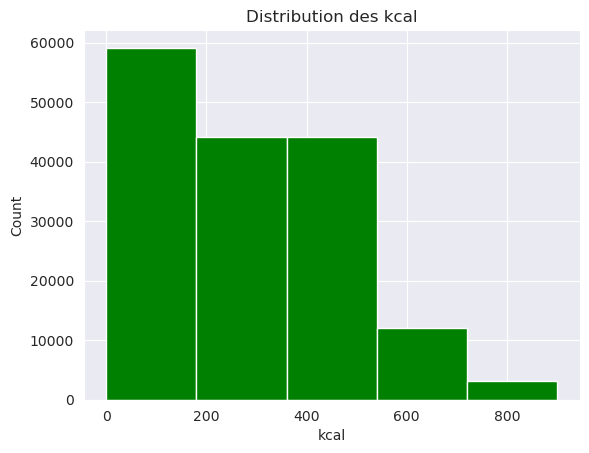

In [452]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#les kcal <= 0 ou > 900 sont aberrantes
print(f'Le nombre de lignes < 100 calories {(data["kcal"] < 400).sum()}')
print(f'Le nombre de lignes > 900 calories {(data["kcal"] > 900).sum()}')

# (Distribution du nombre de produits par tranche d'énergie)
bins = 5

# # Plot the histogram
data['kcal'].hist(bins=bins, rwidth=1, color='g')

# # Add axis labels and plot title
plt.xlabel("kcal")
plt.ylabel("Count")
plt.title("Distribution des kcal")
plt.show()

Le nombre de lignes data avant action est 162787


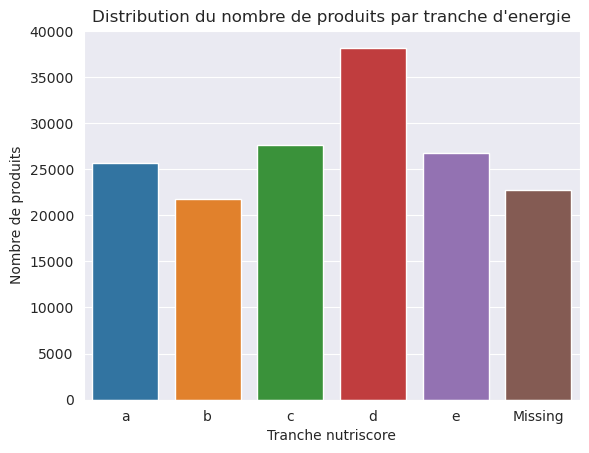

d          38166
c          27653
e          26791
a          25708
Missing    22693
b          21776
Name: nutrition_grade_fr, dtype: int64


In [453]:
data_before_action = data.shape[0]
print(f'Le nombre de lignes data avant action est {data_before_action}')

#distribution produits par nutriscore
# Countplot with the order specified
# Fill the missing values with 'Missing'
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].fillna('Missing')
order = ['a','b','c','d','e','Missing']
sns.countplot(x='nutrition_grade_fr', data=data, order=order)

# Set the plot's title and axis labels
plt.title("Distribution du nombre de produits par tranche d'energie")
plt.xlabel("Tranche nutriscore")
plt.ylabel("Nombre de produits")
# Display the plot
plt.show()
# Print the counts of each value
print(data['nutrition_grade_fr'].value_counts())

In [454]:
# calculer le nutriscore pour les valeurs vides (en moyenne)
def calcul_nutriscore(line):
    A = -0.6 #moyenne des possibilités
    B = 3
    C = 2
    D = 1
    E = 0.35 #moyenne des possibilités
    nutriscore = (A * (2 * line['kcal'] / 100) + B * (line['sugars_100g'] / 100) + C * (line['saturated-fat_100g'] / 100) - D * (line['fiber_100g'] / 100) - E * (line['proteins_100g'] / 100))
    if nutriscore < -2:
        nutriscore_letter = 'a'
    elif nutriscore < -1:
        nutriscore_letter = 'b'
    elif nutriscore < 1:
        nutriscore_letter = 'c'
    elif nutriscore < 3:
        nutriscore_letter = 'd'
    else:
        nutriscore_letter = 'e'
    return  nutriscore_letter

data['sugars_100g'].fillna(0, inplace=True)
data['saturated-fat_100g'].fillna(0, inplace=True)
data['fiber_100g'].fillna(0, inplace=True)
data['proteins_100g'].fillna(0, inplace=True)
data.loc[(data['nutrition_grade_fr'] =='Missing'), 'nutrition_grade_fr'] = data.loc[(data['nutrition_grade_fr'] =='Missing'), ['kcal','sugars_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g']].apply(calcul_nutriscore, axis=1)


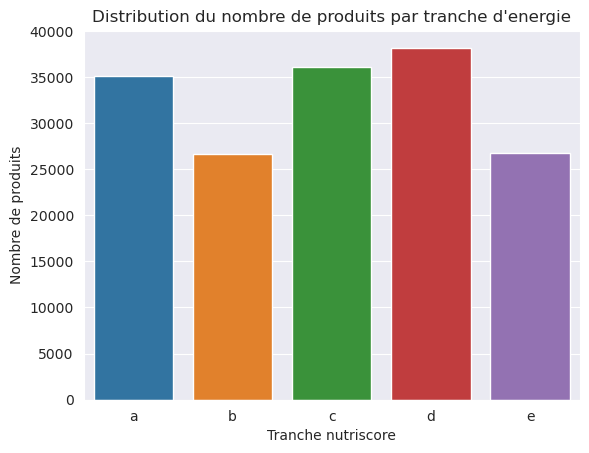

d    38166
c    36107
a    35091
e    26791
b    26632
Name: nutrition_grade_fr, dtype: int64


In [455]:
order = ['a','b','c','d','e']
sns.countplot(x='nutrition_grade_fr', data=data, order=order)

# Set the plot's title and axis labels
plt.title("Distribution du nombre de produits par tranche d'energie")
plt.xlabel("Tranche nutriscore")
plt.ylabel("Nombre de produits")
# Display the plot
plt.show()
# Print the counts of each value
print(data['nutrition_grade_fr'].value_counts())


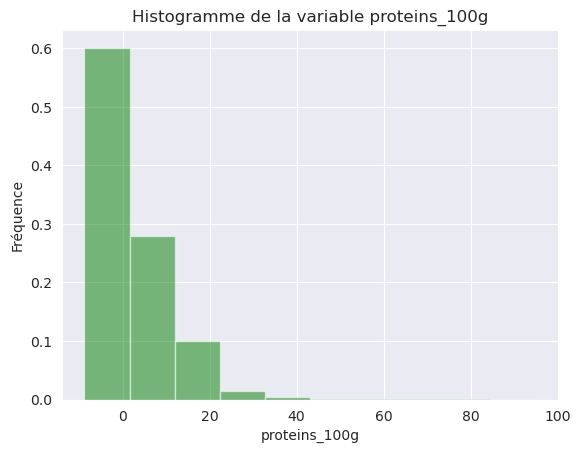

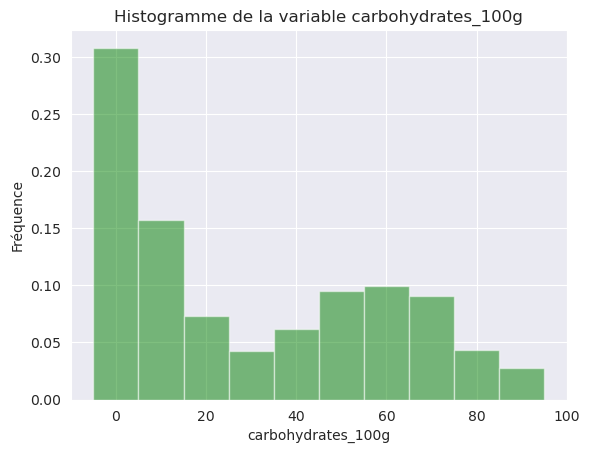

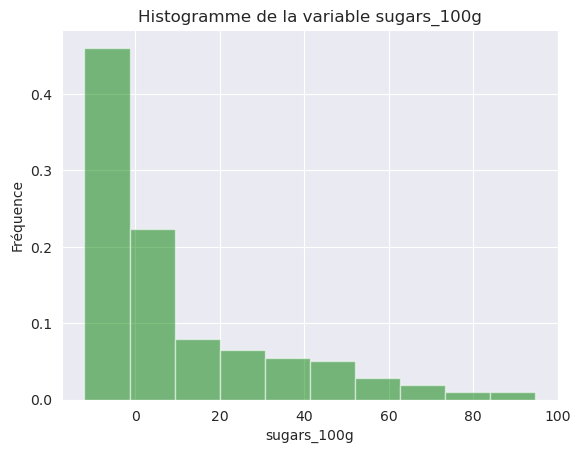

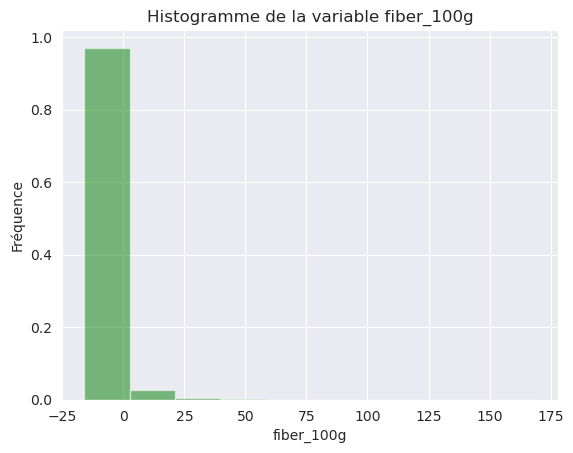

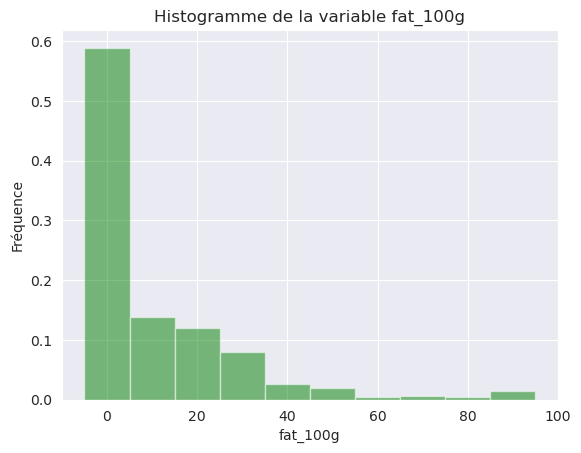

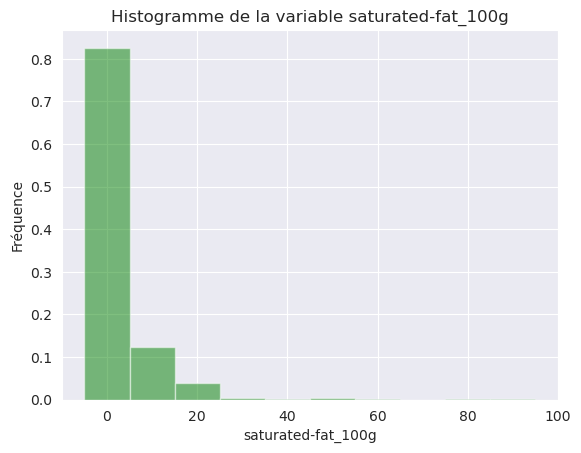

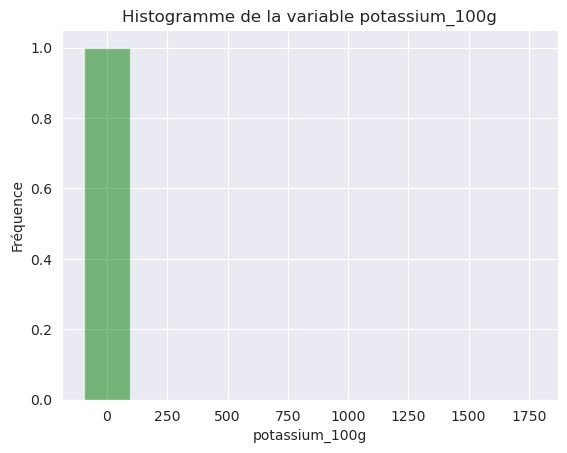

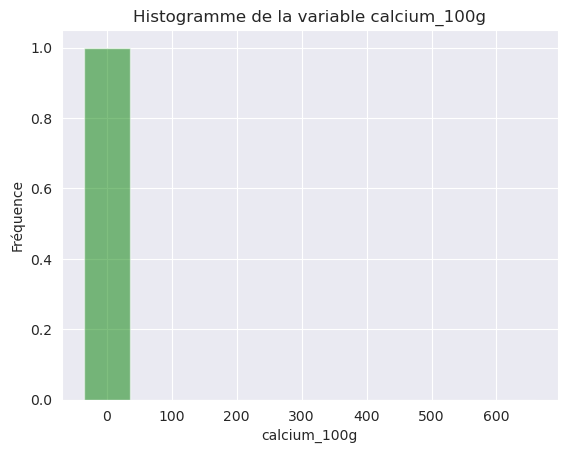

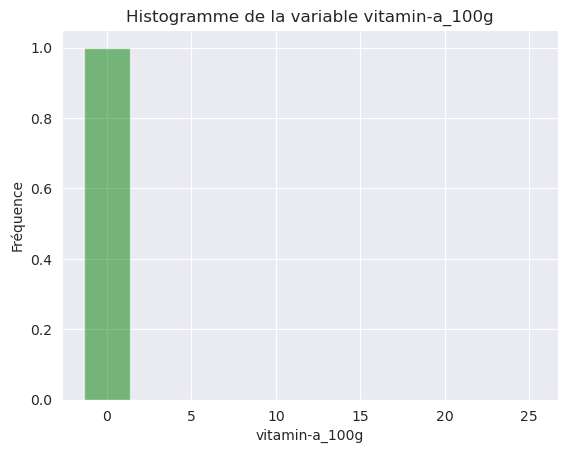

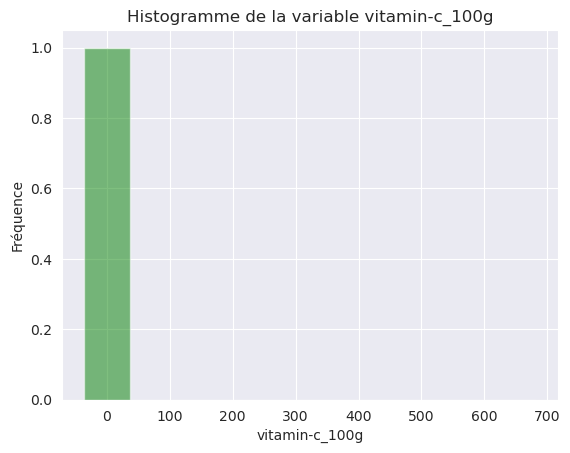

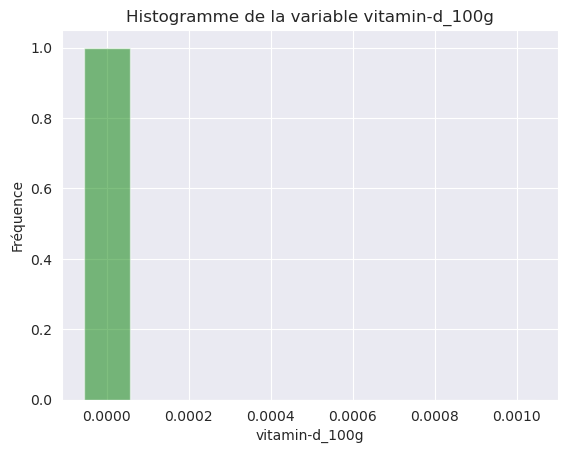

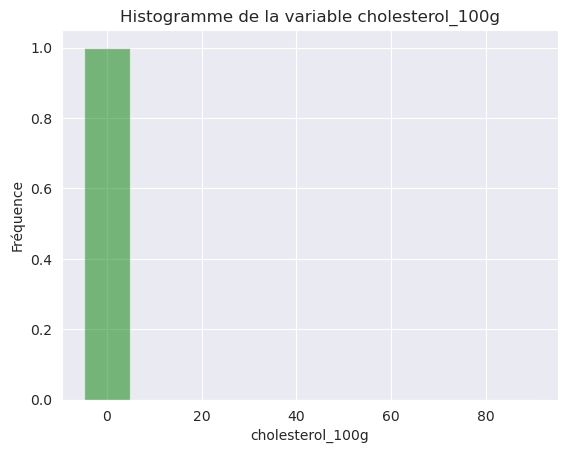

In [456]:
# Création des tranches pour l'histogramme
#Liste de variables quantitatives
quant_vars = ['proteins_100g', 'carbohydrates_100g', 'sugars_100g','fiber_100g','fat_100g', 'saturated-fat_100g', 'potassium_100g','calcium_100g','vitamin-a_100g','vitamin-c_100g','vitamin-d_100g','cholesterol_100g']

# Boucle à travers les variables quantitatives
for var in quant_vars:
    # Calcule les effectifs, les fréquences, les fréquences cumulées
    counts, bin_edges = np.histogram(data[var], bins = 10, density = False)
    freqs = counts / len(data[var])
    cdf = np.cumsum(freqs)

    # Tracer l'histogramme
    plt.bar(bin_edges[:-1], freqs, width = bin_edges[1] - bin_edges[0], color = 'g', alpha = 0.5)
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.title("Histogramme de la variable "+ var)
    plt.show()


